# Task Description

This task is primarily concerned with multi-class classification where you have 3 classes. However, we have changed the original image features in several ways. You will need to deal with class imbalance; in the training set, there are 600 examples from class 0 and 2 but 3600 examples from class 1. Test set has the same class imbalance as the training set.

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2074]:
data  = pd.concat([X,y], axis =1)

In [2075]:
X = pd.read_csv("X_train.csv")
y = pd.read_csv("y_train.csv")

In [2076]:
y.set_index("id", inplace = True)

In [2077]:
X.set_index("id", inplace = True)

In [2078]:
X.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x990,x991,x992,x993,x994,x995,x996,x997,x998,x999
id,,,,,,,,,,,,,,,,,,,,,
0.0,-1.099144,0.918165,-1.227394,0.887061,1.182734,-0.371802,-0.127331,1.201702,1.825839,2.944655,...,-1.111422,1.566261,-1.656656,-0.412988,2.803183,-3.253815,-2.042599,3.497246,-1.275422,2.440708
1.0,0.366477,0.933802,0.061234,0.430073,1.029673,-0.613771,0.364698,1.140867,0.182811,-0.344876,...,-0.672386,-0.003721,-0.496326,0.672818,-0.546066,-0.227112,0.291441,-0.150495,0.156421,0.714252
2.0,-0.425879,-0.802152,0.002718,0.820036,1.490237,-0.888121,0.769524,1.059020,0.854806,-0.077359,...,-1.031358,-0.085724,-0.557461,-0.091904,-0.123858,0.387162,1.031941,0.766522,0.339105,-0.046364
3.0,0.822922,-0.843041,-0.734624,-0.000040,0.123783,-1.777226,0.364601,0.425521,1.265122,0.734897,...,-0.118974,1.271367,-1.518161,-0.315441,0.218074,-1.880067,-0.495170,1.418946,-0.201938,1.475484
4.0,-0.285342,-0.641116,0.436524,-0.618663,0.319982,-1.160489,0.528379,0.337300,-0.156210,-0.756133,...,-0.997750,-1.008573,-0.404263,0.304188,0.313034,-0.514287,0.701526,0.473238,-0.046099,0.492881


In [2079]:
y.head()

,y
id,
0,1
1,0
2,1
3,1
4,1


In [2080]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4799
Data columns (total 1 columns):
y    4800 non-null int64
dtypes: int64(1)
memory usage: 75.0 KB


Checking for missing values 

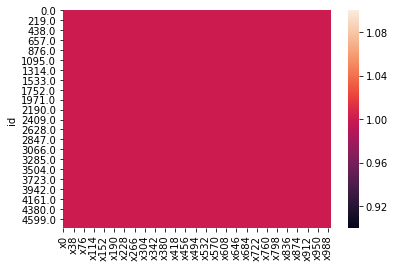

In [2081]:
sns.heatmap(X.notna())

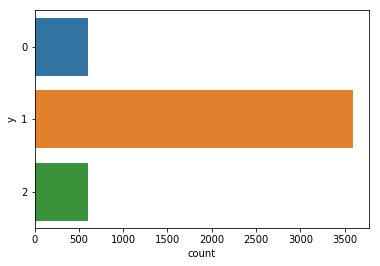

In [2082]:
sns.countplot(data=y, y= "y")

# Normalizing the data and PCA

In [2083]:
from sklearn.preprocessing import StandardScaler, Normalizer

In [2084]:
scaler = StandardScaler()

In [2085]:
rescaledX = scaler.fit_transform(X)

In [2086]:
X= pd.DataFrame(rescaledX)

In [2043]:
from sklearn.decomposition import PCA
pca = PCA(n_components=590)
principalComponents = pca.fit_transform(X)

In [2719]:
X = pd.DataFrame(principalComponents)

# Training the data Random Forest

In [1466]:
from sklearn.model_selection import train_test_split

In [1346]:
from sklearn.ensemble import RandomForestClassifier

In [2017]:
class_weight = dict({ 0:1,1:1.5, 2:1})
RF_1 = RandomForestClassifier(bootstrap=True,
            class_weight=class_weight, 
            criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=25,
            min_weight_fraction_leaf=0.0, n_estimators=250,
            oob_score=False,
            random_state=67,
            verbose=0, warm_start=False)

In [3110]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.35, random_state=100)

In [3111]:
RF_1.fit(X_cc, y_cc)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 1.5, 2: 1},
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=20,
                       min_samples_split=25, min_weight_fraction_leaf=0.0,
                       n_estimators=250, n_jobs=None, oob_score=False,
                       random_state=67, verbose=0, warm_start=False)

In [2020]:
y_pred = RF_1.predict(X_test)

In [2021]:
from sklearn.metrics import confusion_matrix

In [2022]:
cm = confusion_matrix(y_test, y_pred)

In [2023]:
cm

array([[  44,  172,   19],
       [  90, 1266,   71],
       [  34,  190,   34]])

In [2024]:
from sklearn.metrics import balanced_accuracy_score
BMAC = balanced_accuracy_score(y_test, y_pred)


In [2025]:
BMAC

0.40206429392415227

# Undersampling

In [3112]:
from imblearn.under_sampling import RandomUnderSampler

In [3113]:
cc = RandomUnderSampler()
X_cc, y_cc = cc.fit_sample(X_train, y_train)

In [3114]:
y_cc = pd.DataFrame(y_cc)
X_cc = pd.DataFrame(X_cc)


In [1919]:
class_weight = {0: 4.5, 1: 10, 2: 4}
RF_3 =  RandomForestClassifier(bootstrap=True,
            class_weight=class_weight, 
            criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=287,
            oob_score=False,
            random_state=67,
            verbose=0, warm_start=False)

In [1920]:
class_weight

{0: 4.5, 1: 10, 2: 4}

In [1653]:
RF_3.fit(X_cc, y_cc)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight={0: 4.5, 1: 10, 2: 4},
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=20,
                       min_samples_split=20, min_weight_fraction_leaf=0.0,
                       n_estimators=287, n_jobs=None, oob_score=False,
                       random_state=67, verbose=0, warm_start=False)

In [1654]:
RF_3.predict(X_test)

array([1, 2, 1, ..., 1, 0, 1])

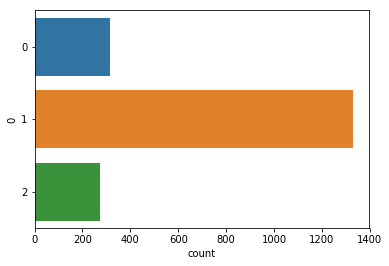

In [1655]:
sns.countplot(y =0,data=pd.DataFrame(RF_3.predict(X_test)))

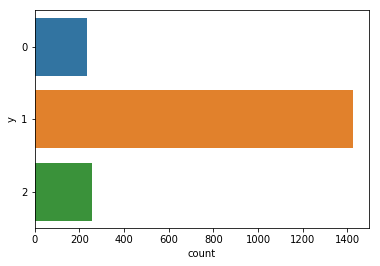

In [1656]:
sns.countplot(y ='y',data=y_test)

In [1657]:
balanced_accuracy_score( y_test, RF_3.predict(X_test))

0.6172234402589675

# Predicting

In [198]:
Xt = pd.read_csv("X_test.csv")
Xt.set_index("id", inplace = True)

In [199]:
scaler = StandardScaler()
rescaledXt = scaler.fit_transform(Xt)
Xt= pd.DataFrame(rescaledXt)

In [200]:
pred = RF_1.predict(Xt)

In [201]:
pred = pd.DataFrame(pred)

In [202]:
pred.to_csv("RandomForrestCP.csv")

# SVM Model

In [3115]:
from sklearn.svm import SVC
class_weight = {0: 0.9, 1: 1, 2:0.9}

In [3141]:
SVC_1 = SVC(C=1, gamma = 0.00021, class_weight=class_weight)

In [3142]:
SVC_1.fit(X_cc, y_cc)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, cache_size=200, class_weight={0: 0.9, 1: 1, 2: 0.9}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.00021, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [3143]:
y_SVCpred= SVC_1.predict(X_test)

In [3144]:
BMAC = balanced_accuracy_score(y_test, y_SVCpred)

In [3145]:
BMAC

0.6751898252892082

In [1664]:
np.linspace(10,10.1,199)

array([10.        , 10.00050505, 10.0010101 , 10.00151515, 10.0020202 ,
       10.00252525, 10.0030303 , 10.00353535, 10.0040404 , 10.00454545,
       10.00505051, 10.00555556, 10.00606061, 10.00656566, 10.00707071,
       10.00757576, 10.00808081, 10.00858586, 10.00909091, 10.00959596,
       10.01010101, 10.01060606, 10.01111111, 10.01161616, 10.01212121,
       10.01262626, 10.01313131, 10.01363636, 10.01414141, 10.01464646,
       10.01515152, 10.01565657, 10.01616162, 10.01666667, 10.01717172,
       10.01767677, 10.01818182, 10.01868687, 10.01919192, 10.01969697,
       10.02020202, 10.02070707, 10.02121212, 10.02171717, 10.02222222,
       10.02272727, 10.02323232, 10.02373737, 10.02424242, 10.02474747,
       10.02525253, 10.02575758, 10.02626263, 10.02676768, 10.02727273,
       10.02777778, 10.02828283, 10.02878788, 10.02929293, 10.02979798,
       10.03030303, 10.03080808, 10.03131313, 10.03181818, 10.03232323,
       10.03282828, 10.03333333, 10.03383838, 10.03434343, 10.03

#

# Neural Network

In [2930]:
from sklearn.neural_network import MLPClassifier

In [2959]:
 clf = MLPClassifier(hidden_layer_sizes=(500), random_state=120, learning_rate= "adaptive", solver = 'adam', alpha =100,activation = 'relu', )

In [2960]:
clf.fit(X_cc, y_cc)

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=100, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=500, learning_rate='adaptive',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=120, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [2961]:
clf.score(X_test, y_test)

0.675

In [2962]:
clf_pred = clf.predict(X_test)

In [2963]:
BMAC = balanced_accuracy_score(y_test, clf_pred)

In [2964]:
BMAC

0.617447984360123

In [2958]:
BMAC2

0.8291354659128286

# SGD

In [2792]:
from sklearn.linear_model import SGDClassifier

In [3161]:
class_weight = dict({ 0:1.3,1:1, 2:1.3})

In [3162]:
SGD = SGDClassifier(class_weight=class_weight, alpha =0.47, max_iter=1000, power_t = 0.95, random_state =190, warm_start = False, n_jobs = -1, n_iter_no_change=1000)


In [3163]:
SGD.fit(X_cc, y_cc)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.47, average=False, class_weight={0: 1.3, 1: 1, 2: 1.3},
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=1000, n_jobs=-1, penalty='l2',
              power_t=0.95, random_state=190, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [3164]:
SGD.predict(X_test)

array([1, 2, 0, ..., 1, 1, 1])

In [3165]:
balanced_accuracy_score(y_test, SGD.predict(X_test))

0.6714968434604858